<a href="https://colab.research.google.com/github/ahmtcnbs/Machine-Learning-Projects/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [618]:
# BASE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Classifier Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble Model - https://scikit-learn.org/stable/modules/ensemble.html
from sklearn.ensemble import BaggingClassifier

# SKLEARN Model Selection 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

# SKLEARN Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

# Preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer

# Decomposition
from sklearn.decomposition import PCA

SEED = 42

In [619]:
# Data Importing

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
# Data Combining
df = pd.concat([train,test])

# Shape

print('Train Shape:', train.shape)
print('Test Shape:', test.shape)
print('DF Shape:', df.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)
DF Shape: (1309, 12)


In [620]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [621]:
print(train.isnull().sum())
print('-'*40)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [622]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [623]:
train.drop(['Name','Ticket'],axis=1,inplace=True)
test.drop(['Name','Ticket'],axis=1,inplace=True)

In [624]:
# Gender Analysis
female = train.loc[train.Sex == 'female']['Survived']
rate_female = sum(female)/len(female)
print('% of female who survived',rate_female)

male = train.loc[train.Sex == 'male']['Survived']
rate_male = sum(male)/len(male)
print('% of male who survived',rate_male)

% of female who survived 0.7420382165605095
% of male who survived 0.18890814558058924


In [625]:
missing = pd.DataFrame({'train_missing': train.drop(columns='Survived').isnull().sum(),
              'test_missing': test.isnull().sum()})

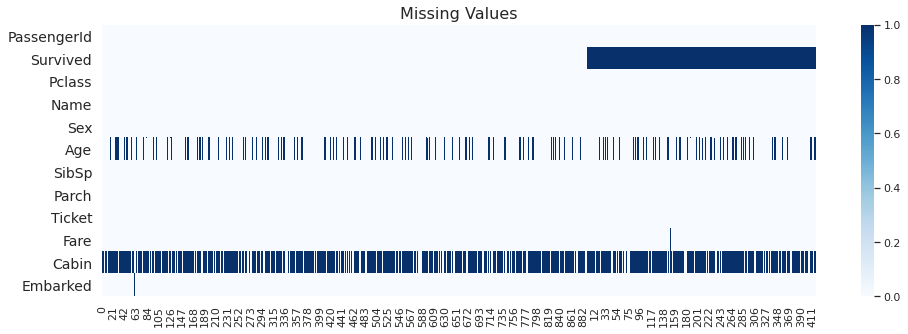

In [626]:
# Missing Values

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

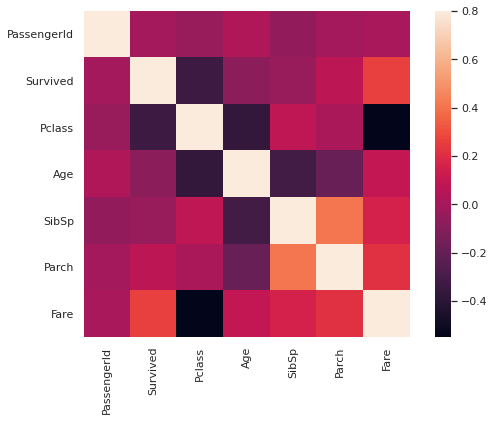

In [627]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True);

In [628]:
# Filling Missing Values

# Fare

train['Embarked'] = train['Embarked'].fillna(train.Embarked.mode().item())
test['Fare'] = test['Fare'].fillna(train.Fare.mean())

# 2- Age
train['Age'].fillna(train['Age'].dropna().median(),inplace=True)
test['Age'].fillna(test['Age'].dropna().median(),inplace=True)

# 3- Family Size Creating

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [629]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [630]:
print(train.isnull().sum())
print('-'*40)
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
dtype: int64
----------------------------------------
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
dtype: int64


Clear !

0: Male <br>
1: Female

In [631]:
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

In [632]:
train.drop(['SibSp'],axis=1,inplace=True)
test.drop('SibSp',axis=1,inplace=True)

train.drop(['Parch'],axis=1,inplace=True)
test.drop('Parch',axis=1,inplace=True)

In [633]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [634]:
combine = [train,test]

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[ (dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454),'Fare'] = 1
    dataset.loc[ (dataset['Fare'] > 14.45) & (dataset['Fare'] <= 31.0),'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.0,'Fare'] = 3

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [639]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,FareBand
0,0,3,0,22.0,0.0,S,2,"(-0.001, 7.91]"
1,1,1,1,38.0,3.0,C,2,"(31.0, 512.329]"
2,1,3,1,26.0,1.0,S,1,"(7.91, 14.454]"
3,1,1,1,35.0,3.0,S,2,"(31.0, 512.329]"
4,0,3,0,35.0,1.0,S,1,"(7.91, 14.454]"


In [661]:
guess_ages = np.zeros((2,3))
guess_ages

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,FareBand,AgeBand
0,0,3,0,1,0.0,0,2,"(-0.001, 7.91]","(-0.08, 10.0]"
1,1,1,1,2,3.0,1,2,"(31.0, 512.329]","(-0.08, 10.0]"
2,1,3,1,1,1.0,0,1,"(7.91, 14.454]","(-0.08, 10.0]"
3,1,1,1,2,3.0,0,2,"(31.0, 512.329]","(-0.08, 10.0]"
4,0,3,0,2,1.0,0,1,"(7.91, 14.454]","(-0.08, 10.0]"


In [665]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.387500
1,"(16.0, 32.0]",NaN
2,"(32.0, 48.0]",NaN
3,"(48.0, 64.0]",NaN
4,"(64.0, 80.0]",0.090909


In [666]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,FareBand,AgeBand
0,0,3,0,0,0.0,0,2,"(-0.001, 7.91]","(-0.08, 16.0]"
1,1,1,1,0,3.0,1,2,"(31.0, 512.329]","(-0.08, 16.0]"
2,1,3,1,0,1.0,0,1,"(7.91, 14.454]","(-0.08, 16.0]"
3,1,1,1,0,3.0,0,2,"(31.0, 512.329]","(-0.08, 16.0]"
4,0,3,0,0,1.0,0,1,"(7.91, 14.454]","(-0.08, 16.0]"


In [ ]:
# embarked (categorical variables to numeric)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C':1, 'Q': 2}).astype(int)

In [645]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,FareBand,AgeBand
0,0,3,0,1,0.0,0,2,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,1,2,3.0,1,2,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,1,1,1.0,0,1,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,1,2,3.0,0,2,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,0,2,1.0,0,1,"(7.91, 14.454]","(32.0, 48.0]"


In [646]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,2,0.0,2,1
1,3,1,2,0.0,0,2
2,2,0,3,1.0,2,1
3,3,0,1,1.0,0,1
4,3,1,1,1.0,0,3


In [ ]:
X_train = train.drop(['Survived','FareBand','AgeBand'],axis=1)
Y_train = train['Survived']

X_test = test.copy()
X_train.shape, Y_train.shape,X_test.shape

In [668]:
# Logistic Regression                                 

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100,2)
acc_knn

# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


87.43

In [669]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.43
8,Decision Tree,87.43
1,KNN,85.63
2,Logistic Regression,80.25
0,Support Vector Machines,80.02
7,Linear SVC,79.57
4,Naive Bayes,76.88
6,Stochastic Gradient Decent,76.88
5,Perceptron,71.83
